## Visualizing Memory Performance

Name: _Christos Dalamarinis_\
Completion date: 28/11/2024\
Link for data: https://neurosynth.org/analyses/terms/memory%20performance/ 

The packages used for this project are:
1) Nilearn
2) Nibabel
3) Matplotlib

The cell below, automatically locates MRI data with specific extensions (.nii and .nii.gz), by indicating the directory path where the files are saved, and prints out the file path(s).

In [9]:
import os
import glob

def locate_mri_files(directory, extensions=['.nii', '.nii.gz']):
    """
    Locate MRI data files in the specified directory based on file extensions.

    Parameters:
    directory (str): The directory to search for MRI files.
    extensions (list): List of file extensions to search for.

    Returns:
    list: List of paths to the located MRI files.
    """
    mri_files = []
    for ext in extensions:
        mri_files.extend(glob.glob(os.path.join(directory, f'*{ext}')))
    return mri_files

#Printing the paths of the MRI files in the specified directory
directory = '/Users/christosdalamarinis/Library/CloudStorage/OneDrive-Personal/Vrije Universiteit Amsterdam/Neuropsychology/Python/Home Assignment/data_1'
mri_files = locate_mri_files(directory)
print(mri_files)

['/Users/christosdalamarinis/Library/CloudStorage/OneDrive-Personal/Vrije Universiteit Amsterdam/Neuropsychology/Python/Home Assignment/data_1/memory performance_uniformity-test_z_FDR_0.01.nii.gz', '/Users/christosdalamarinis/Library/CloudStorage/OneDrive-Personal/Vrije Universiteit Amsterdam/Neuropsychology/Python/Home Assignment/data_1/anatomical.nii.gz']


The cell below imports the data using the nibabel package.

In [10]:
import nibabel as nib
#Assuming the anatomical file is the second file in the list and the functional file is the first
anatomical_file = mri_files[1]
functional_file = mri_files[0]

#Load the anatomical and functional data
anatomical_data = nib.load(anatomical_file).get_fdata()
functional_data = nib.load(functional_file).get_fdata()

#Print the shapes of the anatomical and functional data
print(f"Shape of anatomical data: {anatomical_data.shape}")
print(f"Shape of functional data: {functional_data.shape}")

Shape of anatomical data: (91, 109, 91)
Shape of functional data: (91, 109, 91)


The code below visualizes the functional data on top of the structural data, using the nilearn package, and specifically the plot_stat_map function.

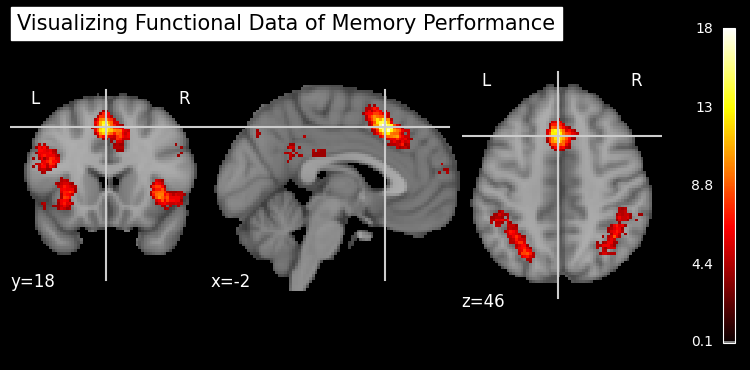

In [11]:
from nilearn.plotting import plot_stat_map
import matplotlib.pyplot as plt
import nibabel as nib

#Visualize the functional data on top of the anatomical data
display = plot_stat_map(nib.Nifti1Image(functional_data, nib.load(functional_file).affine),
                        bg_img=nib.Nifti1Image(anatomical_data, nib.load(anatomical_file).affine), cut_coords=(-2, 18, 46),
                        title="Visualizing Functional Data of Memory Performance", cmap= 'hot', threshold=0.1)

#Show the plot
plt.show()

The cell below creates a histogram for the functional data using the matplotlib package and inserts the data again using nibabel package.

The highest frequency is 3.8694426724309627 with a count of 2535


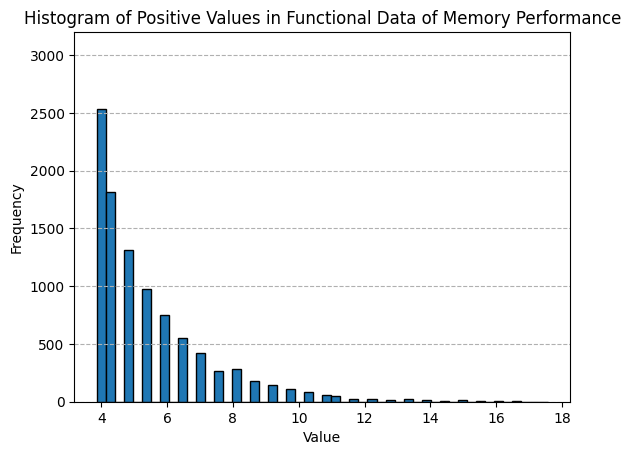

In [12]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

#Load the functional data
fubctional_data = nib.load(functional_file).get_fdata()

#Select all positive values from the functional data
positive_values = functional_data[functional_data > 0]
min_data = positive_values.min()
maximum_data = positive_values.max()

#Checking whether the positive value with the highest frequency from the functional data matches the value in the histogram (y-axis)
unique, counts = np.unique(positive_values, return_counts=True)
max_count_index = np.argmax(counts)
value_with_max_frequency = unique[max_count_index]

#Printing the positive value with the highest frequency
print(f"The highest frequency is {value_with_max_frequency} with a count of {counts[max_count_index]}")

#Plot a histogram of the positive values
plt.hist(positive_values, bins=50, edgecolor='black', range=(min_data, maximum_data))
plt.title('Histogram of Positive Values in Functional Data of Memory Performance')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.ylim(0, 3200) #Setting the limits of the y-axis above the maximum frequency value
plt.grid(axis='y', linestyle = '--')
plt.show()